In [104]:
%matplotlib inline

import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

#from qiime.parse import parse_mapping_file
#from qiime.format import format_mapping_file
from skbio.io.util import open_file
import scipy.stats 
plt.rcParams['figure.figsize'] = (20.0, 20.0)
sns.set(font_scale=1)

In [105]:
mapping=pd.read_table("/Users/priya/Desktop/Knight-Dorrestein/mnm/Phase3/analysis-w-cornell/mm_ag_seqd_w_alpha.txt", dtype=str)
mapping=mapping.set_index("#SampleID")

In [106]:
scores=pd.read_table("/Users/priya/Desktop/Knight-Dorrestein/mnm/Phase3/mm_scores_0916_raw.txt", sep='\t', dtype=str)

In [107]:
#Kit IDs are actually sample IDs
scores=scores.rename(columns={"KitID":"#SampleID"}) 
#appending prefix to bring it to AGP format sample ID
scores["#SampleID"]="10317.0000"+scores["#SampleID"]

In [108]:
scores=scores.set_index("#SampleID")

In [109]:
print(scores.shape)
print(mapping.shape)

(290, 24)
(234, 450)


In [110]:
mapping["bin_bdi21_score"]=pd.Series(index=mapping.index)

In [113]:
count=0
for idx in mapping.index:
    if idx in scores.index:
        mapping.ix[idx,"bin_bdi21_score"]=scores.ix[idx, "BIN_BDI21_SCORE"]

In [125]:
mapping['bin_bdi21_score']=pd.to_numeric(mapping['bin_bdi21_score'])
mapping["PD_whole_tree_even_10000_normalized_alpha"]=pd.to_numeric(mapping["PD_whole_tree_even_10000_normalized_alpha"])
mapping['chao1_even_10000_normalized_alpha']=pd.to_numeric(mapping['chao1_even_10000_normalized_alpha'])
mapping['observed_otus_even_10000_normalized_alpha']=pd.to_numeric(mapping['observed_otus_even_10000_normalized_alpha'])

In [126]:
def bdibinalpha(alphametric):
    '''return alpha div values of samples belonging to each of the 4 bdi bins as separate lists'''
    bdi1=[]
    bdi2=[]
    bdi3=[]
    bdi4=[]
    for samp in mapping.index:
        if mapping.ix[samp, "bin_bdi21_score"]==1:
            bdi1.append(mapping.ix[samp, alphametric])
        if mapping.ix[samp, "bin_bdi21_score"]==2:
            bdi2.append(mapping.ix[samp, alphametric])
        if mapping.ix[samp, "bin_bdi21_score"]==3:
            bdi3.append(mapping.ix[samp, alphametric])
        if mapping.ix[samp, "bin_bdi21_score"]==4:
            bdi4.append(mapping.ix[samp, alphametric])
    return [bdi1,bdi2,bdi3,bdi4]

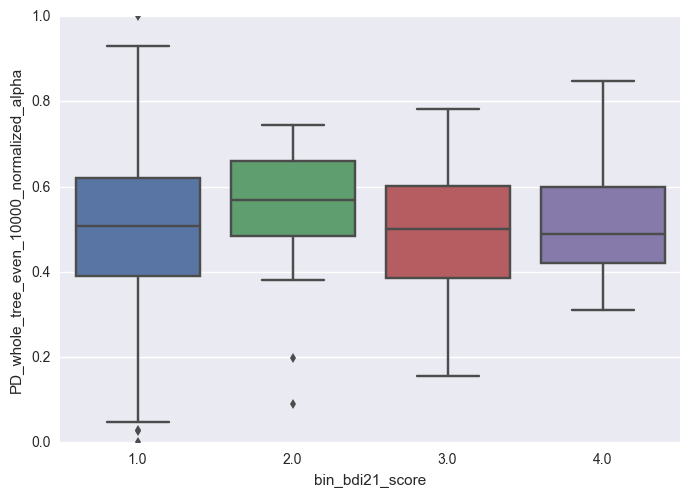

In [127]:
sns.boxplot(x='bin_bdi21_score', y='PD_whole_tree_even_10000_normalized_alpha', data=mapping)

In [128]:
alphalistPD=bdibinalpha('PD_whole_tree_even_10000_normalized_alpha')

In [129]:
len(alphalistPD)

4

In [130]:
scipy.stats.mstats.kruskalwallis(alphalistPD[0],alphalistPD[3]) #p values between bdi 1 and 4 PD values

KruskalResult(statistic=0.0023079697078856043, pvalue=0.96168330138748259)

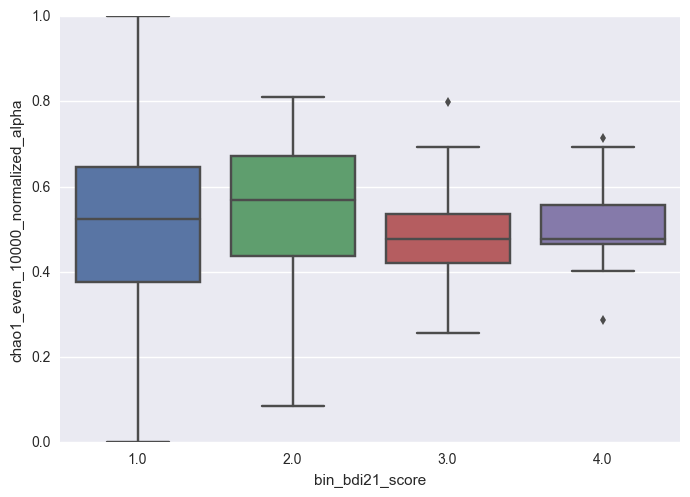

In [131]:
sns.boxplot(x='bin_bdi21_score', y='chao1_even_10000_normalized_alpha', data=mapping)

In [132]:
alphalistchao=bdibinalpha('chao1_even_10000_normalized_alpha')

In [133]:
scipy.stats.mstats.kruskalwallis(alphalistchao[0],alphalistchao[3]) #p values between bdi 1 and 4 PD values

/Users/priya/anaconda2/envs/gneiss_env/lib/python3.5/site-packages/scipy/stats/mstats_basic.py:134: RuntimeWarning: invalid value encountered in isfinite
  output[np.logical_not(np.isfinite(output._data))] = masked


KruskalResult(statistic=0.15708618824373843, pvalue=0.69185348484477238)

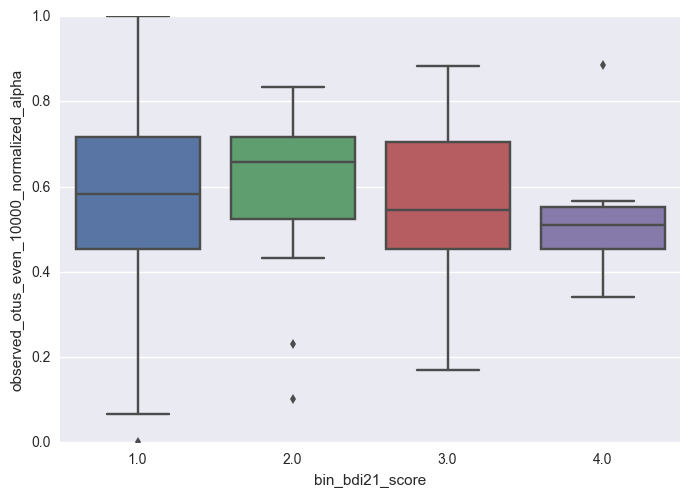

In [134]:
sns.boxplot(x='bin_bdi21_score', y='observed_otus_even_10000_normalized_alpha', data=mapping)

In [135]:
alphalistotu=bdibinalpha('observed_otus_even_10000_normalized_alpha')

In [136]:
scipy.stats.mstats.kruskalwallis(alphalistotu[0],alphalistotu[3]) #p values between bdi 1 and 4 PD values

/Users/priya/anaconda2/envs/gneiss_env/lib/python3.5/site-packages/scipy/stats/mstats_basic.py:134: RuntimeWarning: invalid value encountered in isfinite
  output[np.logical_not(np.isfinite(output._data))] = masked


KruskalResult(statistic=1.2883170560209307, pvalue=0.25635832756496657)

# Looking at borderline cases (not redone after incl. cornell cohort)

In [138]:
#_map=pd.read_table("/Users/priya/Desktop/Knight-Dorrestein/mnm/Phase3/mnm_borderlinecases.txt", index_col="#SampleID") 

In [140]:
#sns.boxplot(x='depression_level', y='PD_whole_tree_even_10000_normalized_alpha', data=_map)

In [141]:
#sns.boxplot(x='depression_level', y='chao1_even_10000_normalized_alpha', data=_map)

In [142]:
#sns.boxplot(x='depression_level', y='observed_otus_even_10000_normalized_alpha', data=_map)